In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as md

In [3]:
#Reading the O2 file for 2022
df_o22 = pd.read_csv("Merging\Sauerstoffgehalt\O2_2022_BU.csv", encoding = 'unicode_escape', sep = ';')
#Removing the forth useless col
del df_o22["Unnamed: 3"]
#Replace the non-number values for O2 content with NaN
df_o22['Sauerstoffgehalt_[mg/l]'].replace(['I','W','F','S','FW','FU','FWU','WU','WB',
                                           'UW','U','UN','UB','FB','IU','SU','BU','X','WN','SN',
                                          'FN','FUN','WUN','XN','FBN','KWN','NU','WNU','FNU','FWNU','SNU',
                                           'XNU','BNU','BN'], np.nan, inplace=True)
#Replace the comma in with dot for decimals to be able to change them to float later
df_o22['Sauerstoffgehalt_[mg/l]'] = df_o22['Sauerstoffgehalt_[mg/l]'].str.replace(',','.')
#Change the date and time format to date time
df_o22['Datum'] = pd.to_datetime(df_o22['Datum'], format='%Y-%m-%d', errors='coerce', utc = True).dt.date
df_o22['Uhrzeit'] = pd.to_datetime(df_o22['Uhrzeit'], format='%H:%M', errors='coerce').dt.time
df_o22

,Datum,Uhrzeit,Sauerstoffgehalt_[mg/l]
0,2022-01-01,00:00:00,13.03
1,2022-01-01,00:10:00,13.01
2,2022-01-01,00:20:00,13.01
3,2022-01-01,00:30:00,13.03
4,2022-01-01,00:40:00,13.03
...,...,...,...
52557,2022-12-31,23:10:00,NaN
52558,2022-12-31,23:20:00,NaN
52559,2022-12-31,23:30:00,NaN
52560,2022-12-31,23:40:00,NaN


In [4]:
#Reading the date for O2 1988_2004
df_o21_1st = pd.read_csv("Merging\Sauerstoffgehalt\Bunthaus_Sauerstoffgehalt_1998bis2004.csv", encoding = 'unicode_escape', sep = ';')
#Replace the comma in with dot for decimals to be able to change them to float later
df_o21_1st['Sauerstoffgehalt_[mg/l]'] = df_o21_1st['Sauerstoffgehalt_[mg/l]'].str.replace(',','.')
#Change the date and time format to date time
df_o21_1st['Datum'] = pd.to_datetime(df_o21_1st['Datum'], format='%Y-%m-%d', errors='coerce', utc = True).dt.date
df_o21_1st['Uhrzeit'] = pd.to_datetime(df_o21_1st['Uhrzeit'], format='%H:%M:%S', errors='coerce').dt.time
df_o21_1st

,Datum,Uhrzeit,Sauerstoffgehalt_[mg/l]
0,1988-06-19,01:00:00,8.1
1,1988-06-19,01:05:00,8.1
2,1988-06-19,01:10:00,8.1
3,1988-06-19,01:15:00,8.1
4,1988-06-19,01:20:00,8.1
...,...,...,...
802228,2004-12-31,23:10:00,13.4
802229,2004-12-31,23:20:00,13.4
802230,2004-12-31,23:30:00,13.4
802231,2004-12-31,23:40:00,13.4


In [5]:
#Reading the date for O2 2005_2021
df_o21_2nd = pd.read_csv("Merging\Sauerstoffgehalt\Bunthaus_Sauerstoffgehalt_2004bis2021.csv", encoding = 'unicode_escape', sep = ';')
#Replace the comma in with dot for decimals to be able to change them to float later
df_o21_2nd['Sauerstoffgehalt_[mg/l]'] = df_o21_2nd['Sauerstoffgehalt_[mg/l]'].str.replace(',','.')
#Change the date and time format to date time
df_o21_2nd['Datum'] = pd.to_datetime(df_o21_2nd['Datum'], format='%Y-%m-%d', errors='coerce', utc = True).dt.date
df_o21_2nd['Uhrzeit'] = pd.to_datetime(df_o21_2nd['Uhrzeit'], format='%H:%M:%S', errors='coerce').dt.time
df_o21_2nd

,Datum,Uhrzeit,Sauerstoffgehalt_[mg/l]
0,2005-01-01,00:00:00,NaN
1,2005-01-01,00:10:00,NaN
2,2005-01-01,00:20:00,NaN
3,2005-01-01,00:30:00,NaN
4,2005-01-01,00:40:00,NaN
...,...,...,...
825101,2021-12-31,23:10:00,13.1
825102,2021-12-31,23:20:00,13
825103,2021-12-31,23:30:00,13.1
825104,2021-12-31,23:40:00,13.1


In [6]:
#Appending the dataframes
df_o = pd.concat([df_o21_1st, df_o21_2nd, df_o22], ignore_index = True)
df_o

,Datum,Uhrzeit,Sauerstoffgehalt_[mg/l]
0,1988-06-19,01:00:00,8.1
1,1988-06-19,01:05:00,8.1
2,1988-06-19,01:10:00,8.1
3,1988-06-19,01:15:00,8.1
4,1988-06-19,01:20:00,8.1
...,...,...,...
1679896,2022-12-31,23:10:00,NaN
1679897,2022-12-31,23:20:00,NaN
1679898,2022-12-31,23:30:00,NaN
1679899,2022-12-31,23:40:00,NaN


In [7]:
#Summary and formatting str to float, and change type to datetime:
df_o['Sauerstoffgehalt_[mg/l]']=df_o['Sauerstoffgehalt_[mg/l]'].astype(float)
df_o['Datum'] = pd.to_datetime(df_o['Datum'])
df_o.info()
#Exporting to csv file
df_o.to_csv('Merging\Sauerstoffgehalt\O1988_2022.csv', index = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1679901 entries, 0 to 1679900
Data columns (total 3 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   Datum                    1679899 non-null  datetime64[ns]
 1   Uhrzeit                  1679899 non-null  object        
 2   Sauerstoffgehalt_[mg/l]  1602461 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 38.5+ MB


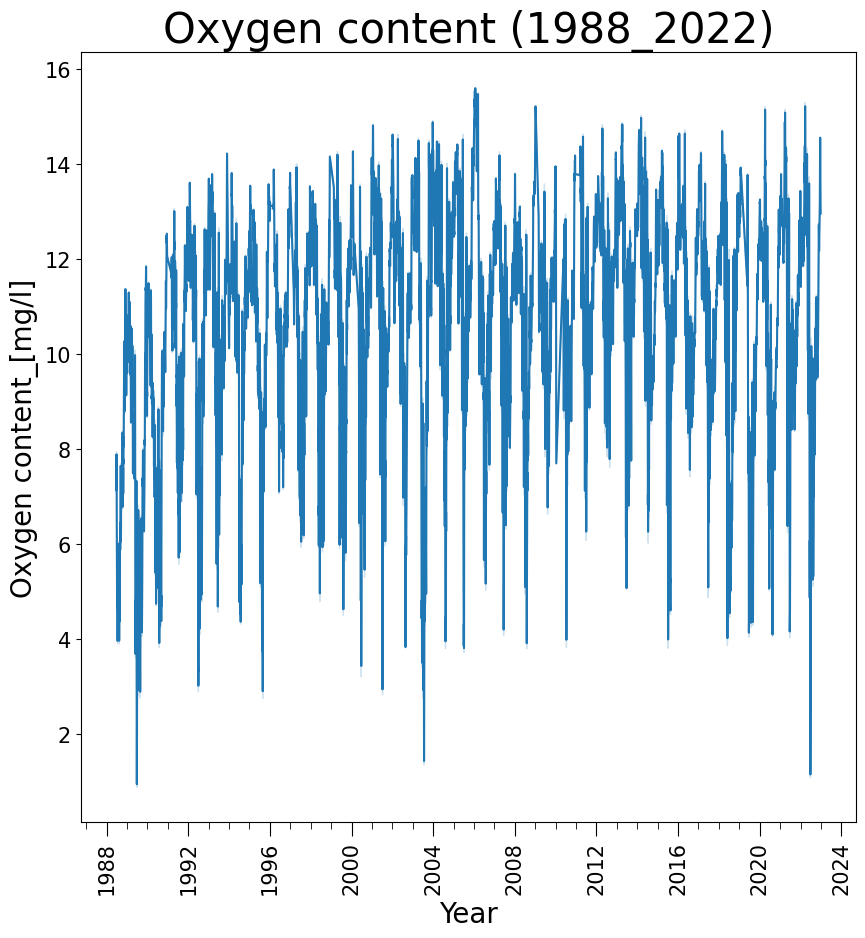

In [8]:
fig, ax = plt.subplots(figsize=(10, 10))
fig = sns.lineplot(data = df_o, x='Datum', y='Sauerstoffgehalt_[mg/l]')
fig.axes.set_title("Oxygen content (1988_2022)",fontsize=30)
fig.set_xlabel("Year",fontsize=20)
fig.set_ylabel("Oxygen content_[mg/l]",fontsize=20)
fig.tick_params(labelsize=15)
import matplotlib.dates as md
# specify the position of the major ticks at the beginning of the week
ax.xaxis.set_major_locator(md.YearLocator(4))
# specify the format of the labels as 'year-month-day'
ax.xaxis.set_major_formatter(md.DateFormatter('%Y'))
# (optional) rotate by 90° the labels in order to improve their spacing
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 90)
# specify the position of the minor ticks at each day
ax.xaxis.set_minor_locator(md.YearLocator())
ax.tick_params(axis = 'x', which = 'major', length = 10)
ax.tick_params(axis = 'x', which = 'minor', length = 5)
plt.show()

In [11]:
#Extracting the year 2022
df_o['Jahr'] = df_o['Datum'].dt.year
df_o_22 = df_o[df_o['Jahr'] == 2022]
df_o_22

,Datum,Uhrzeit,Sauerstoffgehalt_[mg/l],Jahr
1627339,2022-01-01,00:00:00,13.03,2022.0
1627340,2022-01-01,00:10:00,13.01,2022.0
1627341,2022-01-01,00:20:00,13.01,2022.0
1627342,2022-01-01,00:30:00,13.03,2022.0
1627343,2022-01-01,00:40:00,13.03,2022.0
...,...,...,...,...
1679896,2022-12-31,23:10:00,NaN,2022.0
1679897,2022-12-31,23:20:00,NaN,2022.0
1679898,2022-12-31,23:30:00,NaN,2022.0
1679899,2022-12-31,23:40:00,NaN,2022.0


C:\Users\Shayan Kamali\AppData\Local\Temp\ipykernel_15248\2465050037.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  fig = sns.lineplot(data = df_o_22, x='Datum', y='Sauerstoffgehalt_[mg/l]', ci = None, c = 'black')


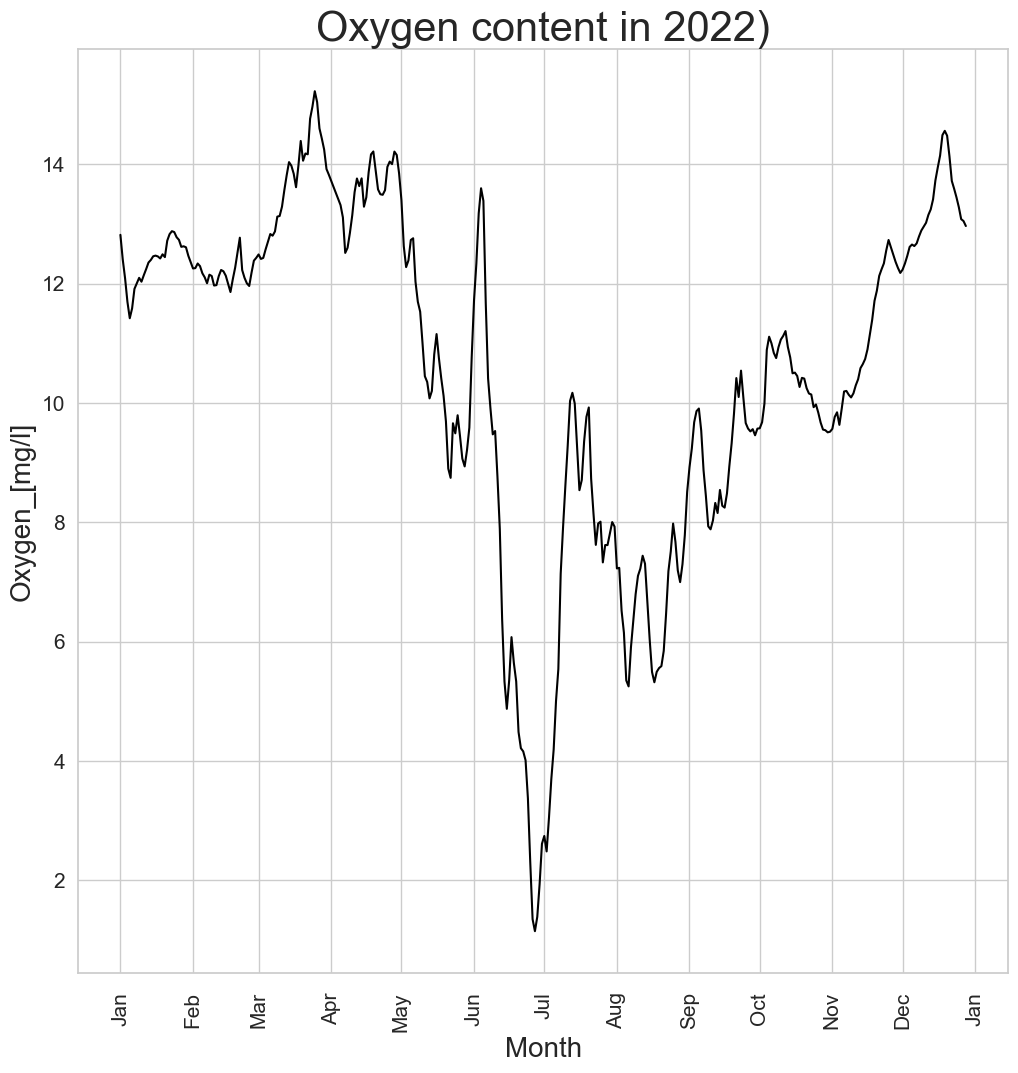

In [19]:
sns.set_theme(style="whitegrid", palette="pastel")
fig, ax = plt.subplots(figsize=(12, 12))
fig = sns.lineplot(data = df_o_22, x='Datum', y='Sauerstoffgehalt_[mg/l]', ci = None, c = 'black')
fig.axes.set_title("Oxygen content in 2022)",fontsize=30)
fig.set_xlabel("Month",fontsize=20)
fig.set_ylabel("Oxygen_[mg/l]",fontsize=20)
fig.tick_params(labelsize=15)
import matplotlib.dates as md
# specify the position of the major ticks at the beginning of the week
ax.xaxis.set_major_locator(md.MonthLocator())
# specify the format of the labels as 'year-month-day'
ax.xaxis.set_major_formatter(md.DateFormatter('%b'))
# (optional) rotate by 90° the labels in order to improve their spacing
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 90)
# specify the position of the minor ticks at each day
ax.xaxis.set_minor_locator(md.MonthLocator())
ax.tick_params(axis = 'x', which = 'major', length = 10)
ax.tick_params(axis = 'x', which = 'minor', length = 5)
plt.show()